In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("education-economy-data.csv")
df.head()

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       191 non-null    object 
 1   Literacy Rate                 191 non-null    float64
 2   Physician Density             191 non-null    float64
 3   GDP (Current USD)             191 non-null    float64
 4   GDP Growth (% Annual)         191 non-null    float64
 5   GDP per Capita (Current USD)  191 non-null    float64
 6   GDP per Capita Category       191 non-null    object 
 7   Unemployment Rate (%)         191 non-null    float64
 8   Continent                     191 non-null    object 
dtypes: float64(6), object(3)
memory usage: 13.6+ KB


In [4]:
df.describe()

,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),Unemployment Rate (%)
count,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.000000
mean,86.994764,1.848639,5.427605e+11,2.666018,18796.795066,7.522831
std,17.622097,1.679639,2.452696e+12,4.362681,30535.286667,7.092726
min,26.800000,0.010000,6.228031e+07,-20.111576,193.007146,0.130000
25%,81.800000,0.345000,1.356848e+10,0.979868,2284.223590,3.139500
50%,95.600000,1.470000,4.260088e+10,2.733798,6947.359287,5.264000
75%,99.000000,2.950000,2.651225e+11,4.987486,22322.354985,9.027000
max,100.000000,8.420000,2.772070e+13,33.802617,256580.515100,50.000000


In [8]:
df.shape

(191, 9)

In [11]:
label_encoders = {}
categorical_cols = ['Country', 'GDP per Capita Category', 'Continent']

df_encoded = df.copy()
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"\n{col} encoded:")
        print(f"  Unique values: {len(le.classes_)}")
        print(f"  Classes: {le.classes_[:5]}..." if len(le.classes_) > 5 else f"  Classes: {le.classes_}")


Country encoded:
  Unique values: 191
  Classes: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola']...

GDP per Capita Category encoded:
  Unique values: 5
  Classes: ['High' 'Low' 'Mid' 'Very High' 'Very Low']

Continent encoded:
  Unique values: 6
  Classes: ['Africa' 'Asia' 'Europe' 'North America' 'Oceania']...


In [12]:
target = 'Unemployment Rate (%)'

# Select features (numeric + encoded categorical)
feature_cols = [
    'Literacy Rate',
    'Physician Density', 
    'GDP (Current USD)',
    'GDP Growth (% Annual)',
    'GDP per Capita (Current USD)',
    'GDP per Capita Category_encoded',
    'Continent_encoded'
]

In [13]:
X = df_encoded[feature_cols].values
y = df_encoded[target].values.reshape(-1, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [17]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [18]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

In [19]:
class DeepRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(32, 16),
            nn.ReLU(),
            
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.network(x)


In [20]:
input_dim = X_train.shape[1]
model = DeepRegressionModel(input_dim)

print(f"\n{'='*70}")
print("MODEL ARCHITECTURE")
print(f"{'='*70}")
print(model)


MODEL ARCHITECTURE
DeepRegressionModel(
  (network): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [21]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")


Total Parameters: 3,137
Trainable Parameters: 3,137


In [52]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [53]:
num_epochs = 1500
train_losses = []
test_losses = []
best_test_loss = float('inf')

for epoch in range(num_epochs):
    # Training mode
    model.train()
    
    # Forward pass
    y_pred_train = model(X_train_tensor)
    train_loss = criterion(y_pred_train, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Evaluation mode
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)
    
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Save best model
    if test_loss.item() < best_test_loss:
        best_test_loss = test_loss.item()
        torch.save(model.state_dict(), 'best_model.pth')
    
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [50/1500] - Train Loss: 0.1539, Test Loss: 0.4130
Epoch [100/1500] - Train Loss: 0.1374, Test Loss: 0.4229
Epoch [150/1500] - Train Loss: 0.1393, Test Loss: 0.4216
Epoch [200/1500] - Train Loss: 0.1321, Test Loss: 0.4214
Epoch [250/1500] - Train Loss: 0.1284, Test Loss: 0.4245
Epoch [300/1500] - Train Loss: 0.1234, Test Loss: 0.4278
Epoch [350/1500] - Train Loss: 0.1416, Test Loss: 0.4251
Epoch [400/1500] - Train Loss: 0.1487, Test Loss: 0.4230
Epoch [450/1500] - Train Loss: 0.1209, Test Loss: 0.4265
Epoch [500/1500] - Train Loss: 0.1490, Test Loss: 0.4298
Epoch [550/1500] - Train Loss: 0.1255, Test Loss: 0.4301
Epoch [600/1500] - Train Loss: 0.1379, Test Loss: 0.4317
Epoch [650/1500] - Train Loss: 0.1345, Test Loss: 0.4247
Epoch [700/1500] - Train Loss: 0.1587, Test Loss: 0.4264
Epoch [750/1500] - Train Loss: 0.1339, Test Loss: 0.4301
Epoch [800/1500] - Train Loss: 0.1172, Test Loss: 0.4323
Epoch [850/1500] - Train Loss: 0.1373, Test Loss: 0.4309
Epoch [900/1500] - Train Loss: 0

In [54]:
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [55]:
model.eval()
with torch.no_grad():
    # Predictions on scaled data
    y_train_pred_scaled = model(X_train_tensor)
    y_test_pred_scaled = model(X_test_tensor)
    
    # Inverse transform to original scale
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.numpy())
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.numpy())

In [56]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [57]:
print("\nTRAINING METRICS:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")



TRAINING METRICS:
  MSE:  3.7600
  RMSE: 1.9391
  MAE:  1.4571
  R²:   0.9304


In [58]:
print("\nTEST METRICS:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")


TEST METRICS:
  MSE:  21.5022
  RMSE: 4.6370
  MAE:  2.9696
  R²:   0.2770


In [59]:
print(f"\n{'='*70}")
print("INTERPRETATION")
print(f"{'='*70}")
rmse_percentage = (test_rmse / y_test.mean()) * 100
print(f"RMSE as % of mean target: {rmse_percentage:.2f}%")
print(f"Average prediction error: ±{test_mae:.2f} percentage points")


INTERPRETATION
RMSE as % of mean target: 83.01%
Average prediction error: ±2.97 percentage points


In [60]:
if test_r2 > 0.9:
    print("✅ EXCELLENT model performance!")
elif test_r2 > 0.7:
    print("✅ GOOD model performance")
elif test_r2 > 0.5:
    print("⚠️  MODERATE model performance")
else:
    print("❌ POOR model performance - consider feature engineering")

❌ POOR model performance - consider feature engineering


In [41]:
first_layer = model.network[0]
weights = first_layer.weight.data.numpy()

importance_dict = {}
for i, feature_name in enumerate(feature_cols):
    importance = np.sum(np.abs(weights[:, i]))
    importance_dict[feature_name] = importance

# Sort by importance
sorted_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
total_importance = sum(importance_dict.values())

print("\nFeature Importance (Ranked):")
for rank, (feature, importance) in enumerate(sorted_features, 1):
    percentage = (importance / total_importance) * 100
    print(f"  {rank}. {feature:35s}: {importance:.4f} ({percentage:.1f}%)")


Feature Importance (Ranked):
  1. GDP (Current USD)                  : 18.9868 (18.6%)
  2. GDP Growth (% Annual)              : 15.3272 (15.0%)
  3. GDP per Capita (Current USD)       : 15.1948 (14.9%)
  4. Physician Density                  : 13.9826 (13.7%)
  5. Literacy Rate                      : 13.6153 (13.3%)
  6. GDP per Capita Category_encoded    : 13.0034 (12.7%)
  7. Continent_encoded                  : 12.1168 (11.9%)



✅ Plots saved as 'regression_analysis.png'


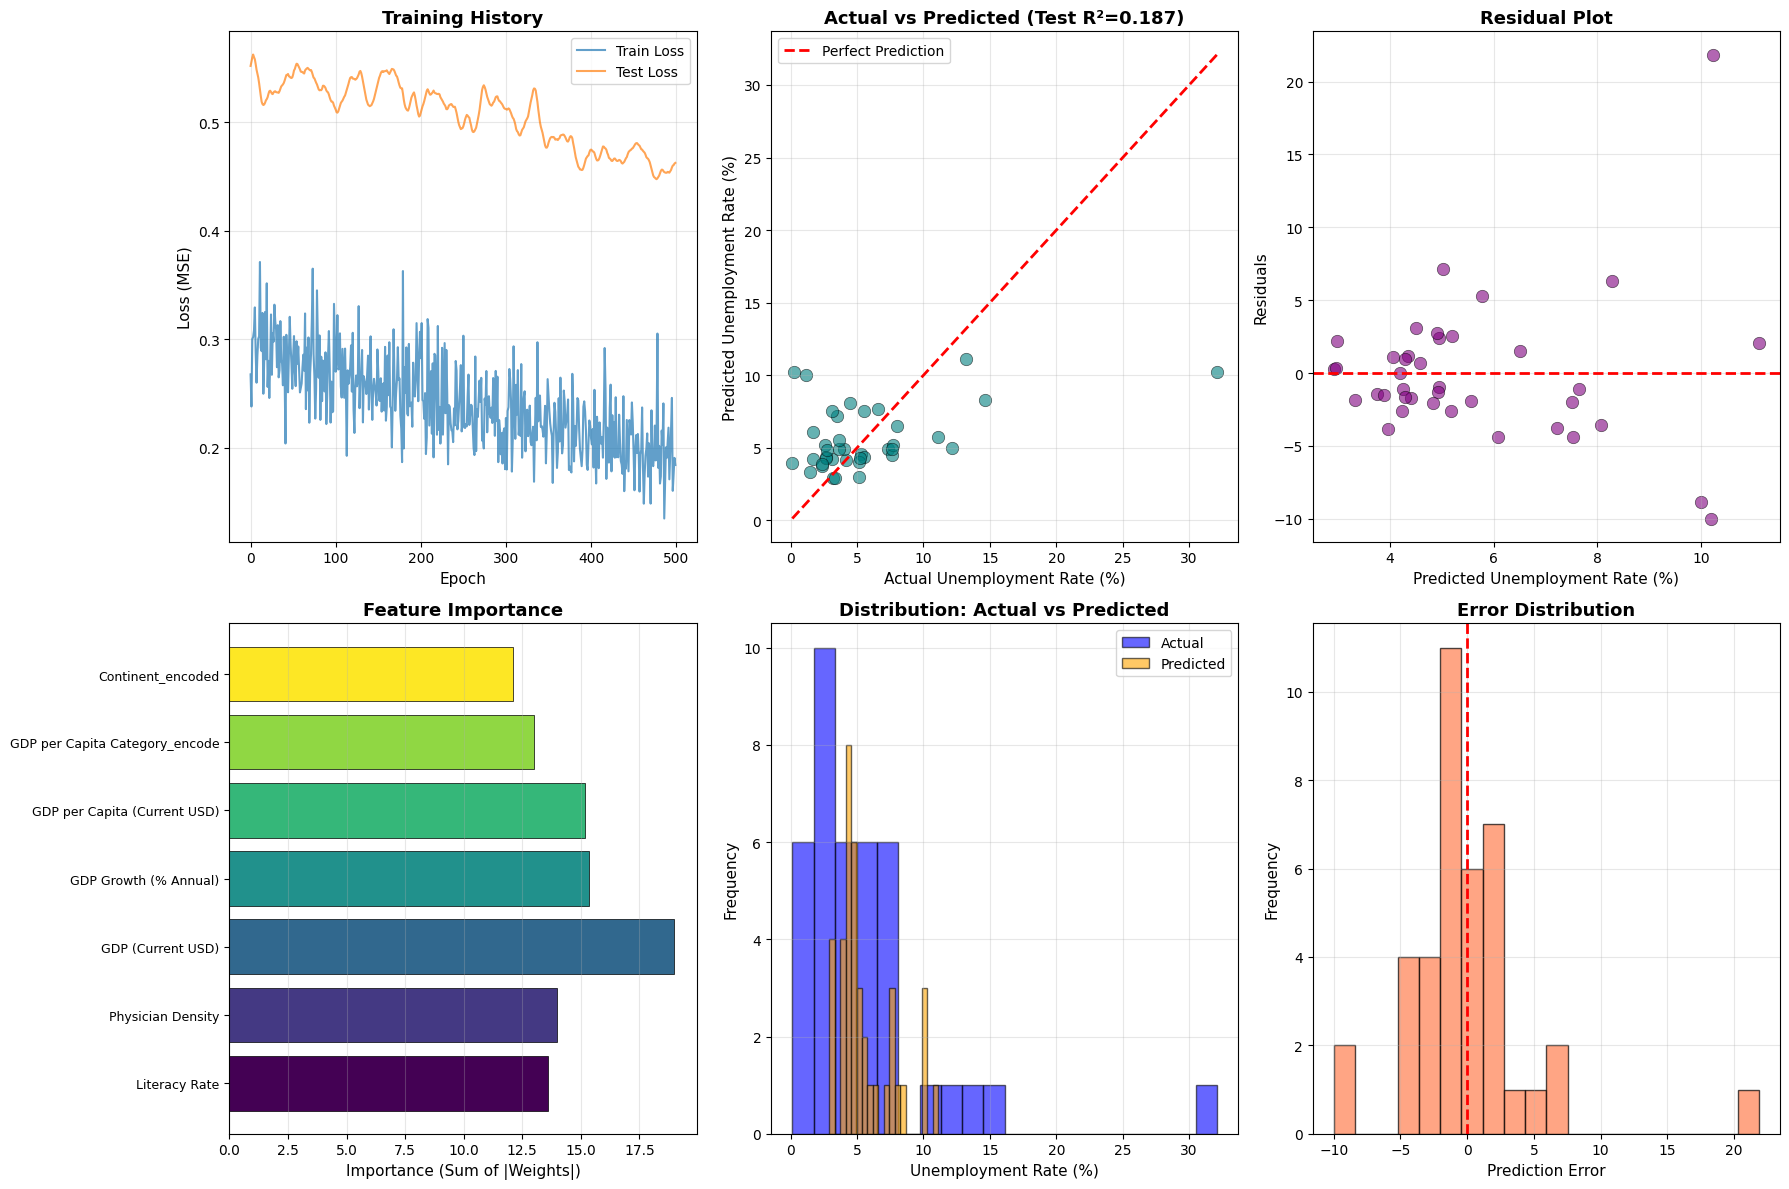

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Training History
axes[0, 0].plot(train_losses, label='Train Loss', alpha=0.7)
axes[0, 0].plot(test_losses, label='Test Loss', alpha=0.7)
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Loss (MSE)', fontsize=11)
axes[0, 0].set_title('Training History', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, s=80, color='teal', edgecolors='black', linewidth=0.5)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Unemployment Rate (%)', fontsize=11)
axes[0, 1].set_ylabel('Predicted Unemployment Rate (%)', fontsize=11)
axes[0, 1].set_title(f'Actual vs Predicted (Test R²={test_r2:.3f})', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals
residuals = y_test - y_test_pred
axes[0, 2].scatter(y_test_pred, residuals, alpha=0.6, s=80, color='purple', edgecolors='black', linewidth=0.5)
axes[0, 2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 2].set_xlabel('Predicted Unemployment Rate (%)', fontsize=11)
axes[0, 2].set_ylabel('Residuals', fontsize=11)
axes[0, 2].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Feature Importance
importance_values = [importance_dict[f] for f in feature_cols]
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_cols)))
bars = axes[1, 0].barh(range(len(feature_cols)), importance_values, color=colors, edgecolor='black', linewidth=0.5)
axes[1, 0].set_yticks(range(len(feature_cols)))
axes[1, 0].set_yticklabels([f[:30] for f in feature_cols], fontsize=9)
axes[1, 0].set_xlabel('Importance (Sum of |Weights|)', fontsize=11)
axes[1, 0].set_title('Feature Importance', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, axis='x', alpha=0.3)

# Plot 5: Distribution of Predictions vs Actual
axes[1, 1].hist(y_test.flatten(), bins=20, alpha=0.6, label='Actual', color='blue', edgecolor='black')
axes[1, 1].hist(y_test_pred.flatten(), bins=20, alpha=0.6, label='Predicted', color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Unemployment Rate (%)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution: Actual vs Predicted', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Error Distribution
axes[1, 2].hist(residuals.flatten(), bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 2].set_xlabel('Prediction Error', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].set_title('Error Distribution', fontsize=13, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_analysis.png', dpi=150, bbox_inches='tight')
print("\n✅ Plots saved as 'regression_analysis.png'")
plt.show()